In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df1=pd.read_csv("tweet_classification.csv",encoding='ISO-8859-1')

In [3]:
df1.sample(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
997241,4,1836041732,Mon May 18 07:15:28 PDT 2009,NO_QUERY,brandyxgreen,Wow....your terrible. Lol
332061,0,2012923504,Tue Jun 02 21:33:15 PDT 2009,NO_QUERY,WindsSilentWord,i agree with @bluestatus. I needa get a job. B...
737957,0,2265357150,Sun Jun 21 06:24:07 PDT 2009,NO_QUERY,raunaqsahu,Massa was brilliant today. Wish Barrichello ha...
875939,4,1680922051,Sat May 02 12:48:21 PDT 2009,NO_QUERY,Rubicka,watching a movie
859988,4,1676252130,Fri May 01 21:30:29 PDT 2009,NO_QUERY,leewaters,"@frfozybearftwin Hey, thanks, man. ;) I can de..."


In [52]:
df2=df1.iloc[:30000]

In [53]:
df2.tail()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
29995,0,1563641721,Sun Apr 19 23:38:18 PDT 2009,NO_QUERY,coliwilso,Oh FFS! I've been here all fucking day. Why de...
29996,0,1563641818,Sun Apr 19 23:38:19 PDT 2009,NO_QUERY,redrum231,Leaving britney-just found out jon from new ki...
29997,0,1563649379,Sun Apr 19 23:40:08 PDT 2009,NO_QUERY,ToniaToxic,"@Neomic I havta' go pee, but Im scared to walk..."
29998,0,1563649439,Sun Apr 19 23:40:11 PDT 2009,NO_QUERY,Tom_1994,Nooooooooooooooo!!!!!! School today. But the w...
29999,0,1563649891,Sun Apr 19 23:40:15 PDT 2009,NO_QUERY,mattydoga,Back to school tomorow


In [54]:
df3=df1.iloc[-30000:]

In [55]:
df3.sample(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1581401,4,2190184980,Tue Jun 16 02:00:38 PDT 2009,NO_QUERY,Sarah_Lois,all i can think about is sashimi right now... ...
1585388,4,2190678204,Tue Jun 16 03:25:05 PDT 2009,NO_QUERY,docbaty,@Yoni Tasted wonderful as well How've you bee...
1594471,4,2192162584,Tue Jun 16 06:36:37 PDT 2009,NO_QUERY,aureldiamond,@emmabung HAI you okay? I'm in WH researching ...
1579387,4,2189936696,Tue Jun 16 01:18:31 PDT 2009,NO_QUERY,exortabreedoll,@Rickyhardianto yesss ! congrats to you too ! ...
1586105,4,2190763068,Tue Jun 16 03:39:31 PDT 2009,NO_QUERY,SummerLovin28x,@coollike http://twitpic.com/7j985 - my sister...


In [56]:
frames=[df2,df3]

In [57]:
df=pd.concat(frames)

In [112]:
df.sample(5)

,Target,Text,final_text
1582620,1,Tonight shoot of Matt buying his golf outfit a...,tonight shoot matt buy golf outfit la quinta m...
1580065,1,watching the USA-Italy replay on espnu pretty...,watch replay espnu pretti good game itali
23152,0,sun is cool.. but macbook not usable on the ba...,sun cool macbook usabl balconi
1593065,1,"@sparki1980 Thanks love. I'm nervous, but I k...",sparki1980 thank love nervou know alright keep...
2798,0,madre is grinding on me this is gonna be a lon...,madr grind gon na long week


In [59]:
df.shape

(60000, 6)

In [60]:
df.drop(columns=['1467810369','Mon Apr 06 22:19:45 PDT 2009','NO_QUERY','_TheSpecialOne_'],inplace=True)

In [61]:
df.columns=["Target","Text"]

In [62]:
df['Target'].value_counts()

0    30000
4    30000
Name: Target, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [64]:
df['Target']=encoder.fit_transform(df['Target'])

In [65]:
df[df['Target']==2]

,Target,Text


In [66]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [67]:
df.duplicated().sum()

253

In [68]:
df=df.drop_duplicates(keep='first')

In [69]:
df.duplicated().sum()

0

In [70]:
df.shape

(59747, 2)

In [71]:
df['Target'].value_counts()

1    29895
0    29852
Name: Target, dtype: int64

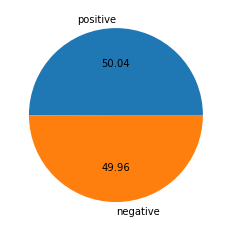

In [72]:
plt.pie(df['Target'].value_counts(),labels=['positive','negative'],autopct="%0.2f")
plt.show()

In [73]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91940\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    lst=[]
    for i in text:
        if i.isalnum():
            lst.append(i)
    final_lst=[word for word in lst if word not in stopwords.words('english')]
    text=final_lst[:]
    final_lst.clear()
    final_txt=[]
    for i in text:
        final_txt.append(ps.stem(i))
    return " ".join(final_txt)
    

In [74]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [75]:
df['Text'][0]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [113]:
transform_text("#milost mumbai indians lost to ##csk #whistlepodu #vadapav")

'milost mumbai indian lost csk whistlepodu vadapav'

In [77]:
df['final_text']=df['Text'].apply(transform_text)

In [78]:
df.head()

,Target,Text,final_text
0,0,is upset that he can't update his Facebook by ...,upset ca updat facebook text might cri result ...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save 50 res...
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad ca see
4,0,@Kwesidei not the whole crew,kwesidei whole crew


In [32]:
# df.to_csv('preprocessed_text.csv',index=False)

In [33]:
# temp_df=pd.read_csv('preprocessed_text.csv')

In [34]:
# temp_df.shape

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.final_text,df.Target,test_size=0.2)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train_cnt=cv.fit_transform(X_train.values)
x_train_cnt.toarray()[:4]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
df['Text'][900]

"Listening to Bjork's All is full of Love... crying "

In [82]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_cnt,y_train)

MultinomialNB()

In [129]:
tweets=[
    'csk is champ team   #winner',
    'mi lost to csk yesterday #looser'
]
tweets_cnt=cv.transform(tweets)
model.predict(tweets_cnt)

array([1, 0], dtype=int64)

In [84]:
x_test_cnt=cv.transform(X_test)
model.score(x_test_cnt,y_test)

0.7560669456066945

In [85]:
y_pred=model.predict(x_test_cnt)

In [86]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(y_test,y_pred)
cf=confusion_matrix(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      5961
           1       0.78      0.72      0.75      5989

    accuracy                           0.76     11950
   macro avg       0.76      0.76      0.76     11950
weighted avg       0.76      0.76      0.76     11950



<AxesSubplot:>

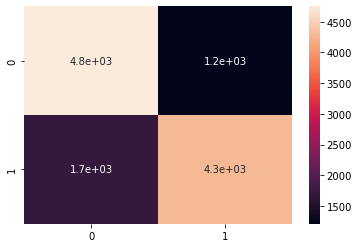

In [88]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

75.60669456066945 %
